# Xopt class, TNK test function

This is the class method for running Xopt.

TNK function
$n=2$ variables:
$x_i \in [0, \pi], i=1,2$

Objectives:
- $f_i(x) = x_i$

Constraints:
- $g_1(x) = -x_1^2 -x_2^2 + 1 + 0.1 \cos\left(16 \arctan \frac{x_1}{x_2}\right) \le 0$
- $g_2(x) = (x_1 - 1/2)^2 + (x_2-1/2)^2 \le 0.5$

In [1]:
# Import the class
from xopt import Xopt

# Notebook printing output
from xopt import output_notebook
output_notebook()


The `Xopt` object can be instantiated from a JSON or YAML file, or a dict, with the proper structure.

Here we will make one

In [2]:
import yaml
# Make a proper input file. 
YAML="""
xopt: {output_path: null}

algorithm:
  name: cnsga
  options:
    max_generations: 50
    population_size: 128
    show_progress: True
  
simulation: 
  name: test_TNK
  evaluate: xopt.tests.evaluators.TNK.evaluate_TNK
  
vocs:
  variables:
    x1: [0, 3.14159]
    x2: [0, 3.14159]
  objectives: {y1: MINIMIZE, y2: MINIMIZE}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: [LESS_THAN, 0.5]
  linked_variables: {x9: x1}
  constants: {a: dummy_constant}

"""
config = yaml.safe_load(YAML)

In [3]:
# Optional: Connect the function directly
#from xopt.evaluators.test_TNK import evaluate_TNK 
#config['simulation']['evaluate'] = evaluate_TNK 

X = Xopt(config)
X

Loading config from dict.
Loading config from dict.
Loading config from dict.
Loading config from dict.
Loading config from dict.



            Xopt 
________________________________           
Version: 0.4.3+183.g2fe3819.dirty
Configured: True
Config as YAML:
xopt: {output_path: null}
algorithm:
  name: cnsga
  options: {max_generations: 50, population_size: 128, show_progress: true, population: null,
    seed: null, crossover_probability: 0.9, mutation_probability: 1.0, selection: auto,
    verbose: null}
  function: xopt.cnsga.cnsga
simulation:
  name: test_TNK
  evaluate: xopt.tests.evaluators.TNK.evaluate_TNK
  options: {extra_option: abc}
vocs:
  variables:
    x1: [0, 3.14159]
    x2: [0, 3.14159]
  objectives: {y1: MINIMIZE, y2: MINIMIZE}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: [LESS_THAN, 0.5]
  linked_variables: {x9: x1}
  constants: {a: dummy_constant}

In [4]:
# Note that the repr string contains all of the config information
X.random_evaluate()

{'y1': 2.7226239655517275,
 'y2': 2.3377558652172357,
 'c1': 11.842907374195631,
 'c2': 8.317403912385236,
 'some_array': array([1, 2, 3])}

# Run CNSGA

CNSGA is designed to run in parallel with an asynchronous executor as defined in PEP 3148

In [5]:
#import logging, sys
#logging.basicConfig(format='%(message)s', level=logging.INFO, stream=sys.stdout)

In [6]:
# Pick one of these

#from concurrent.futures import ThreadPoolExecutor as PoolExecutor
from concurrent.futures import ProcessPoolExecutor as PoolExecutor

executor = PoolExecutor()
# This will also work. 
#executor=None

In [7]:
# Change max generations
X.algorithm['options']['max_generations'] = 10
X.run(executor=executor)

Starting at time 2021-09-28T15:19:13-07:00

    
    
     ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
    ▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
    ▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
    ▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
    ▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
    ░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
      ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
    ░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
    ░ ░               ░       ░        ░       ░  ░
    ░                                              
    
    
    Continuous Non-dominated Sorting Genetic Algorithm
    Version 0.4.3+183.g2fe3819.dirty
    
Creating toolbox from vocs.
Created toolbox with 2 variables, 2 constraints, and 2 objectives.
    Using selection algorithm: nsga2
Initializing with a new population, size 128
Maximum generations: 10
____________________________________________________
128 fitness calculations for initial generation
done.
Submitting 

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

Generation 0 completed in 0.00291 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 1 completed in 0.00378 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 2 completed in 0.00409 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 3 completed in 0.00431 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 4 completed in 0.00471 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 5 completed in 0.00419 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 6 completed in 0.00349 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 7 completed in 0.00368 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 8 completed in 0.00373 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 9 completed in 0.00439 minutes


In [8]:
# The last population is saved internally:
list(X.results)

['variables', 'generation', 'vocs', 'error', 'inputs', 'outputs']

In [9]:
X.results['outputs'][0:5]

[{'y1': 0.5666146523859532,
  'y2': 0.7797899872521277,
  'c1': 0.009975690509941265,
  'c2': 0.08271994887904716,
  'some_array': array([1, 2, 3])},
 {'y1': 0.8606530928802314,
  'y2': 0.49099391124294745,
  'c1': 0.024485880096709857,
  'c2': 0.1301517630387767,
  'some_array': array([1, 2, 3])},
 {'y1': 0.8606530928802314,
  'y2': 0.49099391124294745,
  'c1': 0.024485880096709857,
  'c2': 0.1301517630387767,
  'some_array': array([1, 2, 3])},
 {'y1': 0.49267913110230804,
  'y2': 0.8423570469681569,
  'c1': 0.009886103119658533,
  'c2': 0.11726194273017401,
  'some_array': array([1, 2, 3])},
 {'y1': 0.5284726634551022,
  'y2': 0.7937736968996393,
  'c1': 0.009324540879844079,
  'c2': 0.08711367755430864,
  'some_array': array([1, 2, 3])}]

In [10]:
# Increase the max_generations, and it will continue where it left off
X.algorithm['options']['max_generations'] = 20
X.run(executor=executor)

Starting at time 2021-09-28T15:19:17-07:00

    
    
     ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
    ▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
    ▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
    ▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
    ▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
    ░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
      ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
    ░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
    ░ ░               ░       ░        ░       ░  ░
    ░                                              
    
    
    Continuous Non-dominated Sorting Genetic Algorithm
    Version 0.4.3+183.g2fe3819.dirty
    
Creating toolbox from vocs.
Created toolbox with 2 variables, 2 constraints, and 2 objectives.
    Using selection algorithm: nsga2
Loading config from dict.
Initializing with existing population, size 128
Maximum generations: 31
____________________________________________________
128 fitness calculations for initial

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

Generation 11 completed in 0.00810 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 12 completed in 0.00599 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 13 completed in 0.00593 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 14 completed in 0.00574 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 15 completed in 0.00526 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 16 completed in 0.00521 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 17 completed in 0.00663 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 18 completed in 0.00649 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 19 completed in 0.00515 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 20 completed in 0.00493 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 21 completed in 0.00504 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 22 completed in 0.00510 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 23 completed in 0.00515 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 24 completed in 0.00474 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 25 completed in 0.00505 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 26 completed in 0.00501 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 27 completed in 0.00580 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 28 completed in 0.00635 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 29 completed in 0.00533 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 30 completed in 0.00463 minutes


# Run with MPI

In [11]:
# X.save('test.json')
# !mpirun -n 4 python -m mpi4py.futures -m xopt.mpi.run -vv --logfile xopt.log test.json 

# Plot

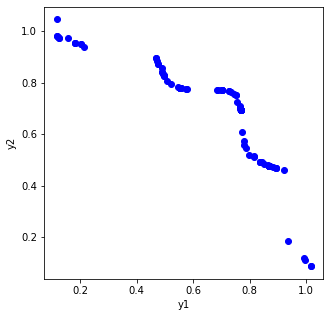

In [12]:
# Extract objectives from output
key1, key2 = list(X.vocs['objectives'])

x = [o[key1] for o in X.results['outputs']]
y = [o[key2] for o in X.results['outputs']]

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(x, y, color='blue')
#ax.set_xlim(X_RANGE)
#ax.set_ylim(Y_RANGE)
ax.set_xlabel(key1)
ax.set_ylabel(key2)
ax.set_aspect('auto')
#ax.set_title(NAME)